In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
pd.set_option('display.max_columns', 500)
label_encoder = LabelEncoder()

housing_factor_tuned = pd.read_pickle("housing_factor_tuned.pkl")
housing_numeric_scaled = pd.read_pickle("housing_numeric_scaled.pkl")
housing_factor_tuned = housing_factor_tuned.apply(label_encoder.fit_transform)
housing_combined = pd.concat([housing_numeric_scaled,housing_factor_tuned],axis=1)

In [94]:
housing_combined = housing_combined[['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'Fireplaces', 'TotalBath', 'LotArea', 'MasVnrArea',
                                                             'OverallCond', 'GarageArea', 'YearRemodAdd', 'Foundation',
                                                             'TotRmsAbvGrd', 'GarageYrBlt', 'PoolArea', 'YrSold', 'MoSold', 'LotFrontage', 'OverallQual',
                                                             'BsmtQual', 'KitchenQual', "BsmtExposure", 'FireplaceQu', 'Neighborhood', 'HeatingQC', 'OpenPorchSF']].copy()

In [95]:
from sklearn import svm
housing_numeric = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_numeric.pkl")
SalePrice = housing_numeric['SalePrice']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
randomForest = ensemble.RandomForestRegressor()
scores = cross_val_score(randomForest, housing_combined, SalePrice, scoring = 'r2', cv=kf, n_jobs = -1)
grid_para_forest = { 
    'n_estimators': [50], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [None], 
    'max_leaf_nodes': [None] 
}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring = 'r2', cv= kf, n_jobs = -1) #accuracy is default scoring method
%time grid_search_forest.fit(housing_combined, SalePrice) 

CPU times: total: 62.5 ms
Wall time: 1.3 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None], 'n_estimators': [50]},
             scoring='r2')

In [96]:
print(scores)
print('Avg Score:',np.mean(scores))
print('Variance:',np.var(scores))

[0.88542412 0.87840742 0.9058888  0.89703715 0.88215422]
Avg Score: 0.8897823429135379
Variance: 0.00010372422650800754


In [97]:
grid_search_forest.best_score_

0.8946723283379893

In [98]:
best_estimator = grid_search_forest.best_estimator_
feature_importance = pd.Series(best_estimator.feature_importances_, index= housing_combined.columns).sort_values(ascending=False).head(28)
feature_importance

OverallQual     0.141486
GrLivArea       0.118352
TotalBsmtSF     0.095141
BsmtQual        0.090739
GarageArea      0.090459
TotalBath       0.087601
YearBuilt       0.065380
KitchenQual     0.052070
GarageYrBlt     0.039576
YearRemodAdd    0.032248
Fireplaces      0.028872
MasVnrArea      0.027352
LotArea         0.027315
LotFrontage     0.018984
TotRmsAbvGrd    0.016839
OpenPorchSF     0.010984
Neighborhood    0.009278
FireplaceQu     0.009157
OverallCond     0.008869
Foundation      0.007949
MoSold          0.007257
BsmtExposure    0.006480
YrSold          0.004356
HeatingQC       0.002894
PoolArea        0.000362
dtype: float64

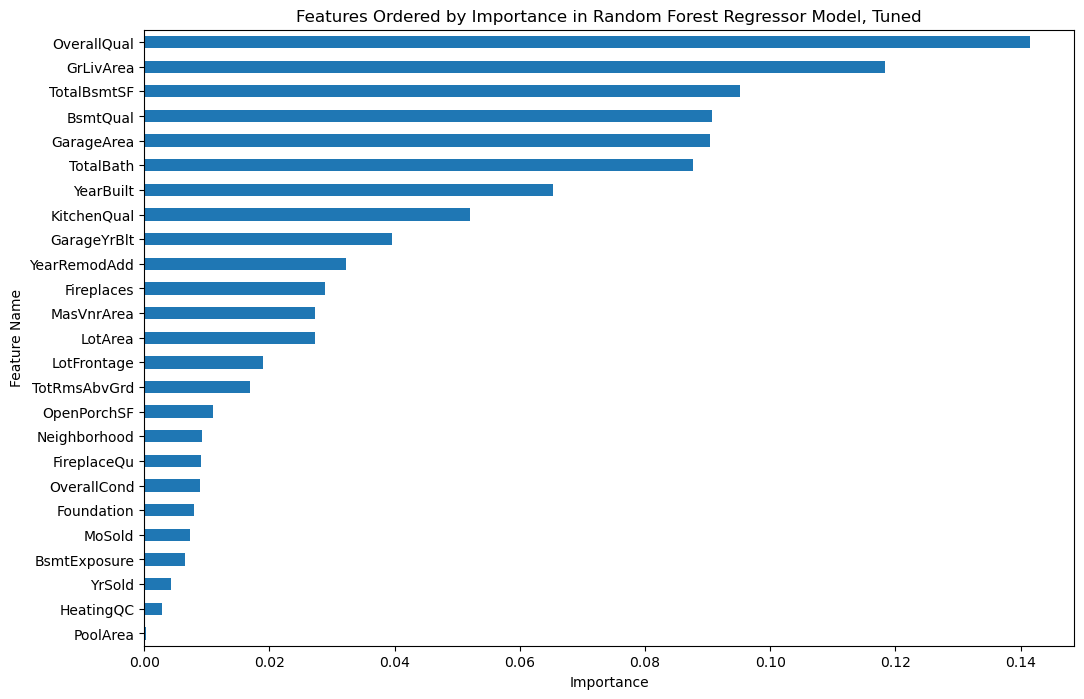

In [99]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title(f'Features Ordered by Importance in Random Forest Regressor Model, Tuned')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 

In [86]:
from sklearn.model_selection import KFold
fold_scores = []
fold_num = 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(housing_combined):
    
    X_train, X_test = housing_combined.iloc[train_index], housing_combined.iloc[test_index]
    y_train, y_test = SalePrice.iloc[train_index], SalePrice.iloc[test_index]
    
    grid_search = GridSearchCV(randomForest, grid_para_forest, cv=5, scoring='r2', n_jobs = -1, return_train_score=True)
    grid_search.fit(X_train, y_train)
    fold_score = grid_search.score(X_test, y_test)
    best_forest = grid_search.best_estimator_
    print(f'Score for Fold: {fold_num}', fold_score)
    print(f'Best Params for Fold {fold_num}', best_forest)

    # Store best parameters and score
    fold_scores.append({
        'score':fold_score,
        'fold':fold_num})
    fold_num += 1

Score for Fold: 1 0.8822655650254274
Best Params for Fold 1 RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score for Fold: 2 0.8831869639426472
Best Params for Fold 2 RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score for Fold: 3 0.8971401533733276
Best Params for Fold 3 RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score for Fold: 4 0.9107605657439314
Best Params for Fold 4 RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score for Fold: 5 0.8867834716072845
Best Params for Fold 5 RandomForestRegressor(max_features=None, n_estimators=50)


In [87]:
total_score = 0
for i, el in enumerate(fold_scores):
    total_score += el['score']
    avg_score = total_score / (i+1)
print(avg_score)

0.8920273439385236


In [88]:
randomForest.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
important_features2 = randomForest.feature_importances_
feature_importances2 = pd.Series(important_features2, index=X_train.columns).head(25)
feature_importances2 = feature_importances2.sort_values(ascending=False)

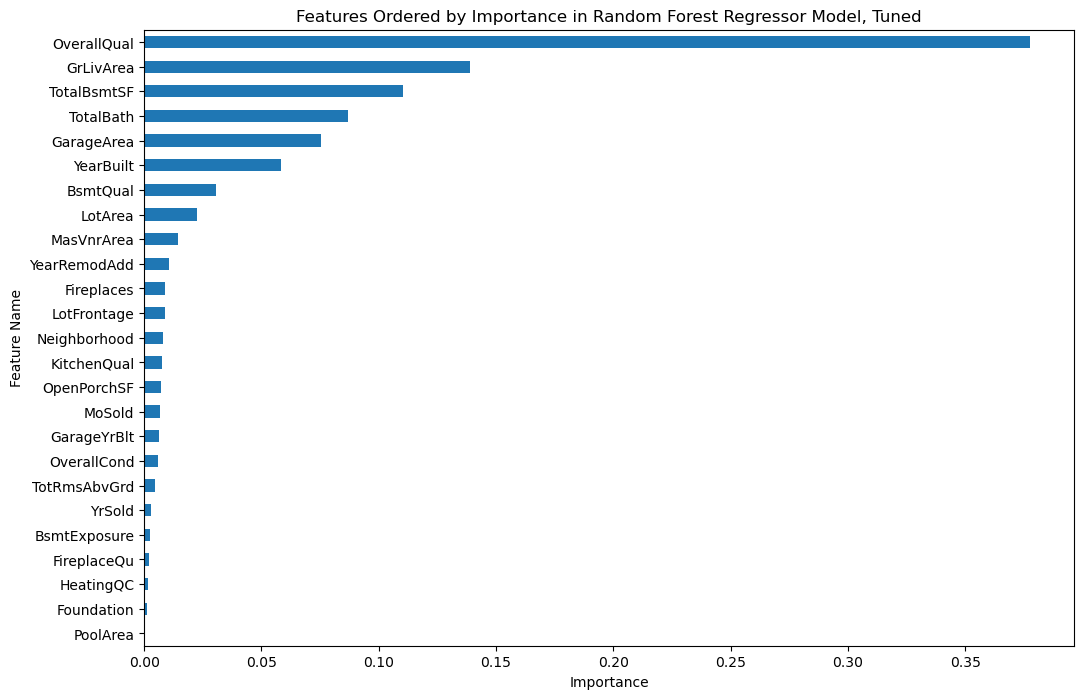

In [92]:
plt.figure(figsize=(12, 8))
feature_importances2.plot(kind='barh')
plt.title(f'Features Ordered by Importance in Random Forest Regressor Model, Tuned')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 